In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

### Data

In [3]:
dname="DATA"; fname=dname+'/x_RBM_2024_lesson.dat'


# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=12 digits
[0 0 1 1 0 0 1 0 0 0 1 1]
[0 0 1 1 0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0 0 1 0 0]
[0 0 1 1 0 1 1 1 1 0 0 0]
[1 0 1 0 1 1 1 1 1 1 0 0]
[0 0 1 0 1 1 0 0 1 1 0 0]
[1 1 1 0 0 0 1 1 0 1 1 1]
[1 1 1 1 0 0 1 0 1 1 0 0]
[1 1 0 0 0 0 1 1 0 0 1 1]
[1 1 1 0 1 1 0 0 1 0 0 0]
[0 0 0 1 0 1 0 0 0 0 1 1]
[1 1 1 1 1 1 0 1 1 1 0 0]
...


In [4]:
from IPython.display import display_html 
import pandas as pd

def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: white;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v[:N1])
df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

/tmp/ipykernel_52852/2100262172.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df0s.applymap(is_one)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,1,1,0,0,1,0,0,0,1,1
1,0,0,1,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,0,0,0,0,1,0,0
3,0,0,1,1,0,1,1,1,1,0,0,0
4,1,0,1,0,1,1,1,1,1,1,0,0
5,0,0,1,0,1,1,0,0,1,1,0,0
6,1,1,1,0,0,0,1,1,0,1,1,1
7,1,1,1,1,0,0,1,0,1,1,0,0
8,1,1,0,0,0,0,1,1,0,0,1,1
9,1,1,1,0,1,1,0,0,1,0,0,0


## Initialize

In [5]:
# RBM, nr of hidden units
M = 3
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-1.05710581e-01  2.47325276e-01 -2.68236999e-01]
 [-2.86977895e-01  1.01512472e+00  7.19551678e-01]
 [ 4.79774212e-02  1.45493088e-01  3.97121546e-01]
 [ 6.43656130e-01  5.20110348e-01 -6.69365702e-01]
 [ 1.42005069e-01  1.18210102e-01  6.98643250e-01]
 [ 4.57750143e-01 -1.03364106e+00 -1.92018661e-01]
 [ 8.61880964e-01 -2.26476438e-01 -2.78721284e-01]
 [ 2.46314000e-01  1.67774743e+00 -5.27359626e-01]
 [-2.98006602e-01  6.40959511e-02  1.56268971e-01]
 [ 2.70474733e-01  4.85557355e-04  6.93940393e-01]
 [-3.68472529e-01 -4.29205842e-01 -1.22398236e+00]
 [-9.60892739e-01 -4.44493209e-01  2.89257786e-01]]
a= [-0.65372576  0.06187846 -0.54919547  0.1718999  -1.21839863 -0.10304354
 -0.79628307 -0.50128587 -0.67494752  0.14787037  0.19519016 -0.38930533]
b= [0. 0. 0.]


## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1]


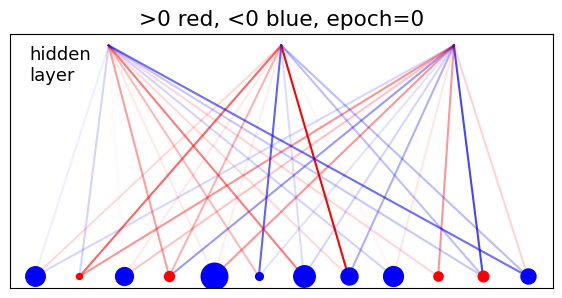

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 3.3))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=300.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.51,0.85,"hidden\nlayer")
    plt.show()
                  
plotgraph()

### Activation function with sigmoid


In [7]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [0 0 1 1 0 0 1 0 0 0 1 1]
act= [ 0.22414925 -0.43457205 -1.48569002]
prob= [0.55580386 0.3930351  0.18456951]
output= [0 0 0]


array([0, 0, 0])

## RBM train


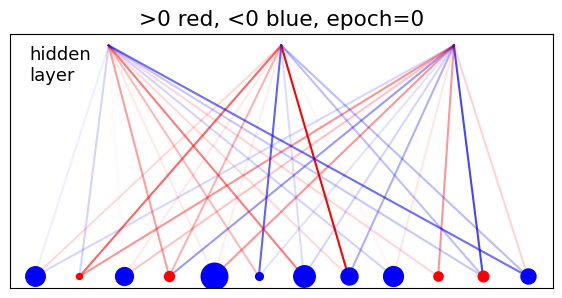

----------- epoch = 0   k= 499   m= 500
dw = [[ 0.06   0.078  0.054]
 [-0.182 -0.24  -0.148]
 [ 0.024  0.002  0.018]
 [-0.084 -0.126 -0.094]
 [ 0.06   0.046  0.054]
 [ 0.05   0.054  0.062]
 [ 0.064  0.08   0.032]
 [-0.08  -0.118 -0.092]
 [ 0.1    0.108  0.066]
 [-0.118 -0.144 -0.11 ]
 [ 0.138  0.13   0.086]
 [ 0.106  0.1    0.058]]
da = [ 0.162 -0.226  0.074 -0.12   0.142  0.162  0.13  -0.088  0.174 -0.18
  0.234  0.208]
db = [-0.046 -0.086 -0.064]
----------- epoch = 1   k= 499   m= 500
dw = [[-0.05742574 -0.0019802   0.00792079]
 [-0.03168317  0.0039604  -0.00792079]
 [-0.03564356 -0.04554455 -0.03564356]
 [-0.02178218 -0.02970297 -0.00594059]
 [-0.03960396 -0.02970297  0.04554455]
 [-0.03762376 -0.05346535  0.03168317]
 [-0.01782178  0.04356436 -0.01188119]
 [-0.04158416 -0.03564356 -0.02178218]
 [-0.02772277 -0.00594059  0.05148515]
 [-0.03960396 -0.02178218 -0.02772277]
 [-0.03762376  0.0019802   0.02772277]
 [-0.02178218  0.0039604  -0.01584158]]
da = [-0.00594059  0.         -0.

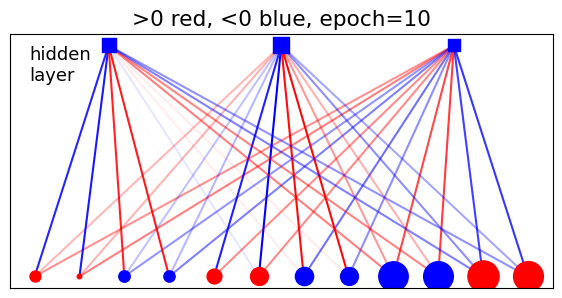

l_rate =  0.9090909090909092


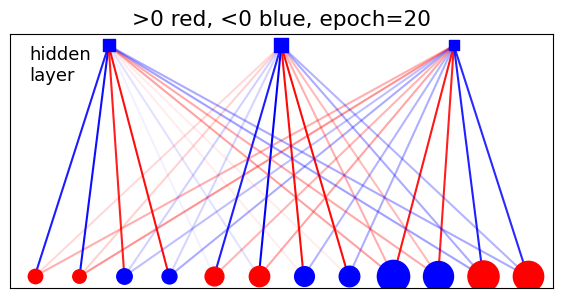

l_rate =  0.8333333333333337


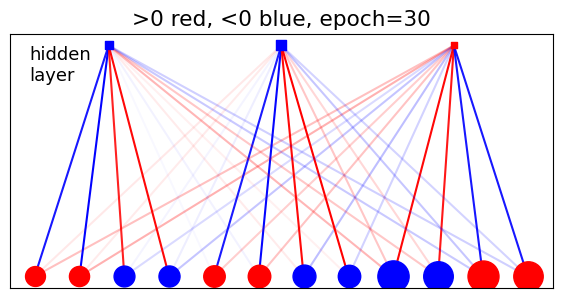

l_rate =  0.7692307692307697


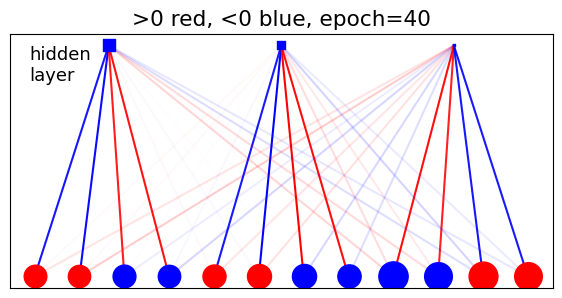

l_rate =  0.7142857142857149


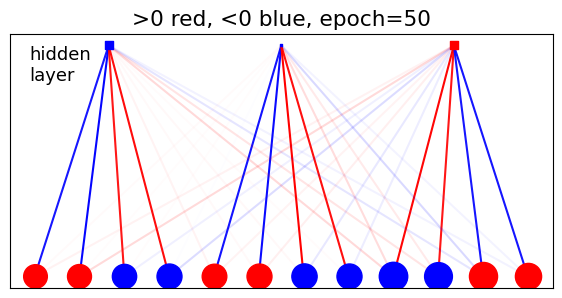

l_rate =  0.6666666666666671


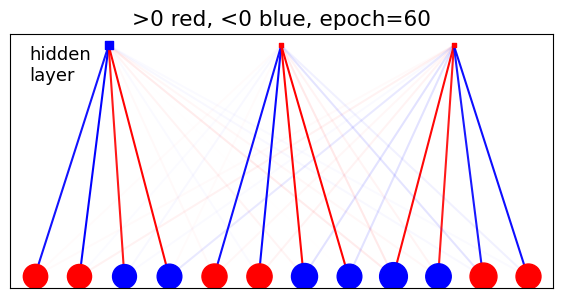

l_rate =  0.6250000000000006


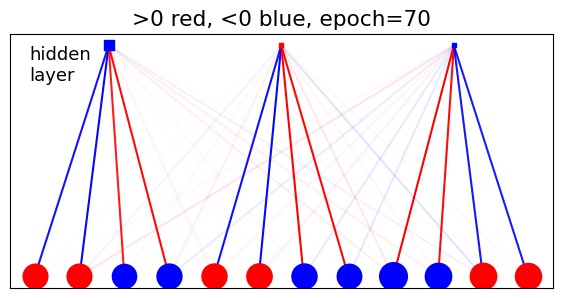

l_rate =  0.5882352941176475


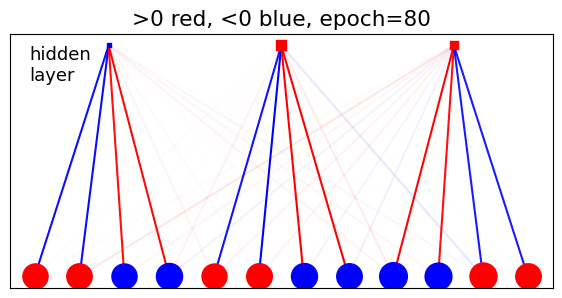

l_rate =  0.555555555555556


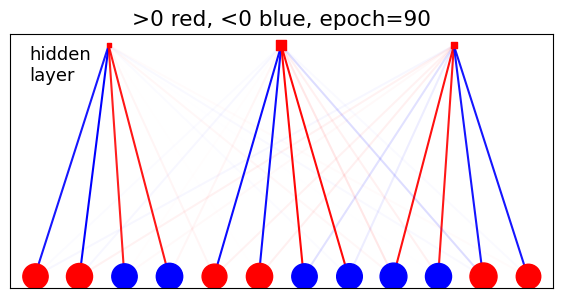

l_rate =  0.5263157894736847


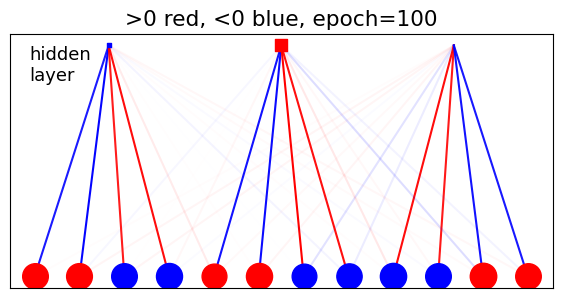

l_rate =  0.5000000000000009


In [8]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate in l_rate_m
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [9]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

w0= [[-1.05710581e-01  2.47325276e-01 -2.68236999e-01]
 [-2.86977895e-01  1.01512472e+00  7.19551678e-01]
 [ 4.79774212e-02  1.45493088e-01  3.97121546e-01]
 [ 6.43656130e-01  5.20110348e-01 -6.69365702e-01]
 [ 1.42005069e-01  1.18210102e-01  6.98643250e-01]
 [ 4.57750143e-01 -1.03364106e+00 -1.92018661e-01]
 [ 8.61880964e-01 -2.26476438e-01 -2.78721284e-01]
 [ 2.46314000e-01  1.67774743e+00 -5.27359626e-01]
 [-2.98006602e-01  6.40959511e-02  1.56268971e-01]
 [ 2.70474733e-01  4.85557355e-04  6.93940393e-01]
 [-3.68472529e-01 -4.29205842e-01 -1.22398236e+00]
 [-9.60892739e-01 -4.44493209e-01  2.89257786e-01]]
a0= [-0.65372576  0.06187846 -0.54919547  0.1718999  -1.21839863 -0.10304354
 -0.79628307 -0.50128587 -0.67494752  0.14787037  0.19519016 -0.38930533]
b0= [0. 0. 0.]
w= [[-2.11980205  0.00338158  0.02344499]
 [-2.32773063 -0.06990947  0.08920206]
 [ 2.10520438  0.00951075  0.0940959 ]
 [ 2.25517085  0.07869226 -0.0409069 ]
 [ 0.18395678 -2.19600011  0.05810856]
 [ 0.02090032 -2.27

## Test: noise reduction

In [10]:
from IPython.display import display_html 
import pandas as pd

ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
    
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

/tmp/ipykernel_52852/1240026007.py:26: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df0s.applymap(is_one)
/tmp/ipykernel_52852/1240026007.py:27: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df1s.applymap(is_one)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,1,1,0,0,1,0,0,0,1,1
1,0,0,1,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,0,0,0,0,1,0,0
3,0,0,1,1,0,1,1,1,1,0,0,0
4,1,0,1,0,1,1,1,1,1,1,0,0
5,0,0,1,0,1,1,0,0,1,1,0,0
6,1,1,1,0,0,0,1,1,0,1,1,1
7,1,1,1,1,0,0,1,0,1,1,0,0
8,1,1,0,0,0,0,1,1,0,0,1,1
9,1,1,1,0,1,1,0,0,1,0,0,0
